In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [5]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

BMI: 18 a 30 = 1; resto = 0

MentalHealth y PhysicalHealth: 0 a 10 = 1; resto = 0

SleepTime: 5 a 12 = 1; resto = 0

In [6]:
X_train['BMI'] = X_train['BMI'].map(lambda x: 1 if (x >= 18 and x<=30) else 0)
X_train['SleepTime'] = X_train['SleepTime'].map(lambda x: 1 if (x >= 5 and x<= 12) else 0)
X_train['PhysicalHealth'] = X_train['PhysicalHealth'].map(lambda x: 1 if x<=10 else 0)
X_train['MentalHealth'] = X_train['MentalHealth'].map(lambda x: 1 if x<=10 else 0)

X_test['BMI'] = X_test['BMI'].map(lambda x: 1 if (x >= 18 and x<=30) else 0)
X_test['SleepTime'] = X_test['SleepTime'].map(lambda x: 1 if (x >= 5 and x<= 12) else 0)
X_test['PhysicalHealth'] = X_test['PhysicalHealth'].map(lambda x: 1 if x<=10 else 0)
X_test['MentalHealth'] = X_test['MentalHealth'].map(lambda x: 1 if x<=10 else 0)

In [7]:
len(X_train), len(X_test)

(38312, 16422)

In [8]:
rf = RandomForestClassifier(random_state=10)

In [9]:
params = [
    {'n_estimators': [80, 100, 120]},
    {'max_depth': [5, 10, 15]},
    {"min_samples_split": [2, 5]},
    {"min_samples_leaf": [1, 2]},
    {"random_state":[10]}
]

In [10]:
gs = GridSearchCV(rf, param_grid = params, cv=5, scoring='recall')

In [11]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid=[{'n_estimators': [80, 100, 120]},
                         {'max_depth': [5, 10, 15]},
                         {'min_samples_split': [2, 5]},
                         {'min_samples_leaf': [1, 2]}, {'random_state': [10]}],
             scoring='recall')

In [12]:
gs.best_params_

{'min_samples_leaf': 2}

In [13]:
gs.best_score_

0.7880037535782424

In [14]:
rf_clf = gs.best_estimator_

In [15]:
rf_clf

RandomForestClassifier(min_samples_leaf=2, random_state=10)

In [16]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=10)

In [17]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [18]:
preds = rf_clf.predict(X_test)

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      8211
           1       0.74      0.78      0.76      8211

    accuracy                           0.75     16422
   macro avg       0.75      0.75      0.75     16422
weighted avg       0.75      0.75      0.75     16422



In [20]:
recall_score(y_test, preds)

0.7839483619534771

In [21]:
accuracy_score(y_test, preds)

0.7531969309462916

In [22]:
cm = confusion_matrix(y_test, preds)

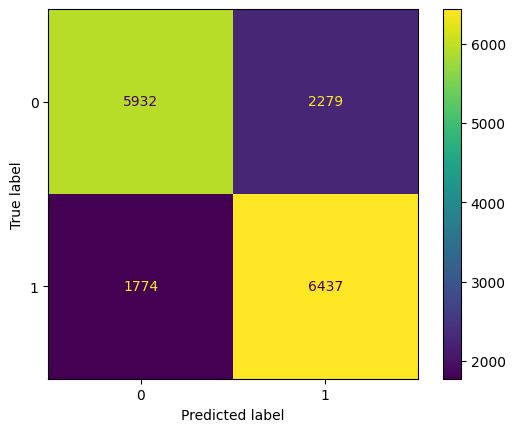

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

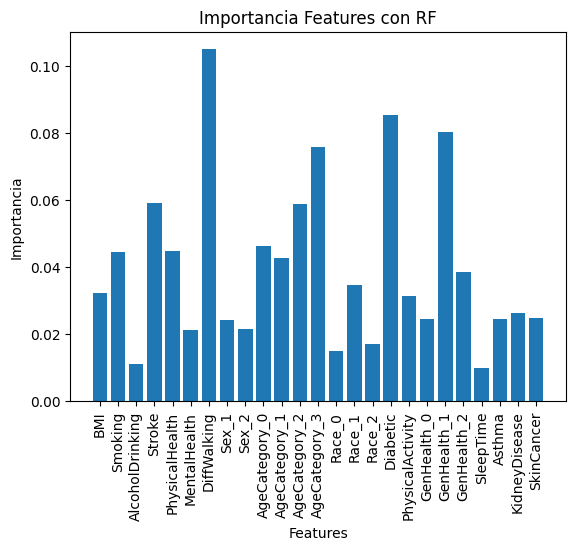

In [24]:
plt.bar(X_train.columns, rf_clf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90)
plt.show()

In [25]:
import eli5 as eli

2023-07-08 12:58:05.715739: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 12:58:05.766913: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 12:58:05.767896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 12:58:07.062822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:
eli.explain_weights(rf_clf)

Weight,Feature
0.1050 ± 0.0937,x6
0.0854 ± 0.0704,x16
0.0803 ± 0.0482,x19
0.0757 ± 0.0305,x12
0.0591 ± 0.0369,x3
0.0588 ± 0.0252,x11
0.0464 ± 0.0248,x9
0.0450 ± 0.0525,x4
0.0444 ± 0.0259,x1
0.0427 ± 0.0110,x10


Un ejemplo para una prediccion con resultado 0 y otra con resultado 1

In [27]:
eli.explain_prediction(rf_clf, np.array(X_test)[1])

/home/pedro/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation(estimator='RandomForestClassifier(min_samples_leaf=2, random_state=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5002226456462726, std=None, value=1.0), FeatureWeight(feature='x19', weight=0.1213964007571075, std=None, value=0.0), FeatureWeight(feature='x6', weight=0.06538310039424845, std=None, value=0.0), FeatureWeight(feature='x7', weight=0.06451843812724997, std=None, value=0.0), FeatureWeight(feature='x14', weight=0.05157462858258939, std=None, value=1.0), FeatureWeight(feature='x8', weight=0.038859562055314614, std=None, value=1.0), FeatureWeight(feature='x4', weight=0.028884204368862, std=None, value=1.0), FeatureWeight(feature='x10', weight=0.02888097673052987, std=None, value=0.0), FeatureWeight(feature='x3', weight=0.02596364930739991, std=None, value=0.0), FeatureWeight(feature='x18', weight=0.02434007093063579, std=None, value=0.0), FeatureWeight(feature='x17', weight=0.017106142693283345, std=None, value=1.0), FeatureWeight(feature='x23', weight=0.016409588870727427, std=None, value=0.0), FeatureWeight(feature='x24', weight=0.007209534188545689, std=None, value=0.0), FeatureWeight(feature='x22', weight=0.005047974619012471, std=None, value=0.0), FeatureWeight(feature='x0', weight=0.004318332486405308, std=None, value=1.0), FeatureWeight(feature='x21', weight=0.0037648655311103797, std=None, value=1.0), FeatureWeight(feature='x11', weight=1.5909634157917908e-06, std=None, value=0.0)], neg=[FeatureWeight(feature='x16', weight=-0.21789483045077024, std=None, value=1.0), FeatureWeight(feature='x1', weight=-0.0571854424993999, std=None, value=1.0), FeatureWeight(feature='x12', weight=-0.026601539906826482, std=None, value=1.0), FeatureWeight(feature='x9', weight=-0.009231042838109839, std=None, value=1.0), FeatureWeight(feature='x13', weight=-0.005332876452367606, std=None, value=0.0), FeatureWeight(feature='x15', weight=-0.003895917606158731, std=None, value=0.0), FeatureWeight(feature='x20', weight=-0.002441243949173711, std=None, value=1.0), FeatureWeight(feature='x2', weight=-0.0019068890429594916, std=None, value=0.0), FeatureWeight(feature='x5', weight=-0.0009013643702913227, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.6784905591366532, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [28]:
y_test[1]

0

In [29]:
eli.explain_prediction(rf_clf, np.array(X_test)[10000])

/home/pedro/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation(estimator='RandomForestClassifier(min_samples_leaf=2, random_state=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.4997773543537272, std=None, value=1.0), FeatureWeight(feature='x16', weight=0.12730916839139597, std=None, value=1.0), FeatureWeight(feature='x6', weight=0.10677024768268084, std=None, value=1.0), FeatureWeight(feature='x19', weight=0.044272407691856384, std=None, value=1.0), FeatureWeight(feature='x7', weight=0.033138905330158744, std=None, value=1.0), FeatureWeight(feature='x1', weight=0.027890264393276784, std=None, value=1.0), FeatureWeight(feature='x20', weight=0.025987860270069447, std=None, value=1.0), FeatureWeight(feature='x14', weight=0.023242241044689887, std=None, value=0.0), FeatureWeight(feature='x8', weight=0.021107704446612897, std=None, value=0.0), FeatureWeight(feature='x0', weight=0.014659736906479023, std=None, value=0.0), FeatureWeight(feature='x15', weight=0.00435070905441895, std=None, value=1.0), FeatureWeight(feature='x5', weight=0.003644753955260126, std=None, value=1.0), FeatureWeight(feature='x13', weight=0.0013422916737075785, std=None, value=0.0), FeatureWeight(feature='x12', weight=0.0007901060627088763, std=None, value=1.0), FeatureWeight(feature='x2', weight=0.00016152226134665936, std=None, value=0.0)], neg=[FeatureWeight(feature='x9', weight=-0.029883020072262553, std=None, value=1.0), FeatureWeight(feature='x3', weight=-0.02519529795456386, std=None, value=0.0), FeatureWeight(feature='x4', weight=-0.01888555779465321, std=None, value=1.0), FeatureWeight(feature='x23', weight=-0.017770643513936594, std=None, value=0.0), FeatureWeight(feature='x24', weight=-0.009821061892091169, std=None, value=0.0), FeatureWeight(feature='x18', weight=-0.008418311933088072, std=None, value=0.0), FeatureWeight(feature='x17', weight=-0.008028391048947243, std=None, value=1.0), FeatureWeight(feature='x22', weight=-0.006724417405648161, std=None, value=0.0), FeatureWeight(feature='x11', weight=-0.0032169807667562188, std=None, value=0.0), FeatureWeight(feature='x21', weight=-0.0024947116461865736, std=None, value=1.0), FeatureWeight(feature='x10', weight=-0.0019865351953918605, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=0.8020203442948636, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [30]:
y_test[10000]

1

In [31]:
from joblib import dump

In [32]:
dump(rf_clf, '/home/pedro/TpIAFiuba/Modelos/RF_Model_binario.joblib') 

['/home/pedro/TpIAFiuba/Modelos/RF_Model_binario.joblib']